In [60]:
import numpy as np
import matplotlib.pyplot as plt

### Distribuições

In [2]:
def my_bernoulli(p):
    uniform = np.random.uniform(0, 1)
    if uniform <= p:
        return 1
    else:
        return 0

In [3]:
def my_exponential(lam=1):
    u = np.random.uniform()
    x = - np.log(u) / lam
    return x

In [4]:
def my_normal(a=0, b=1):
    u = np.random.uniform()
    y = my_exponential()
    while u > np.exp(-((y-1) ** 2)/2):
        u = np.random.uniform()
        y = my_exponential()
    if my_bernoulli(0.5):
        y *= -1
    return a + np.sqrt(b) * y

### Exercício 1

Monte Carlo direto:

In [13]:
sample = []
n = 1000000
for i in range(n):
    X = my_normal(0, 1)
    if X > 10:
        sample.append(1)
    else:
        sample.append(0)
mean = np.mean(sample)
sd = np.std(sample)
std_error = sd / n ** 0.5
print(f"Mean = {mean:.3f}\n95% confidence interval: ({mean - std_error * 2:.4f}, {mean + std_error * 2:.4f})")

Mean = 0.000
95% confidence interval: (0.0000, 0.0000)


Importance sampling Monte Carlo:

In [45]:
def normal_density(x, mean):
    return np.exp((-1/2) * ((x-mean)**2)) * (1 / (np.pi*2) ** 1/2)

In [54]:
def indicator(x, a):
    return x > a

In [59]:
sample = []
n = 10000
for i in range(n):
    x = my_normal(10, 1)
    if x > 10:
        sample.append(normal_density(x, 0) / normal_density(x, 10))
    else:
        sample.append(0)
mean = np.mean(sample)
sd = np.std(sample)
std_error = sd / n ** 0.5
print(f"Mean = {mean}\n95% confidence interval: ({mean - std_error * 2}, {mean + std_error * 2})")

Mean = 7.781644402090717e-24
95% confidence interval: (7.251138719347935e-24, 8.312150084833498e-24)


### Exercício 2

In [66]:
def gx_density(x):
    return 10 * np.exp(-5 * (x-5) ** 4)

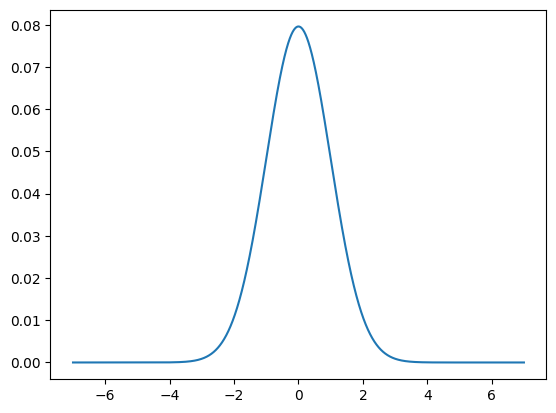

In [72]:
axis = np.linspace(-7, 7, 10000)
plt.plot(axis, normal_density(axis, 0))
plt.show()

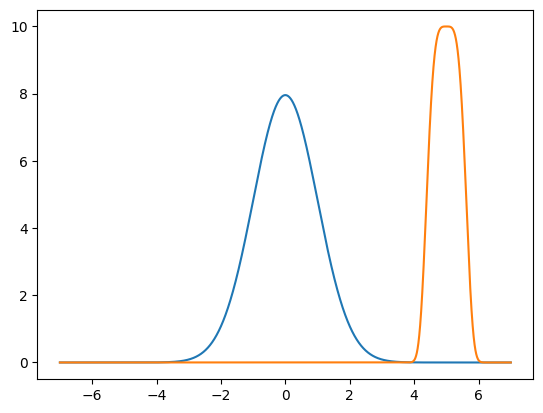

In [74]:
plt.plot(axis, 100*normal_density(axis, 0))
plt.plot(axis, gx_density(axis))
plt.show()